In [1]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load hashtags and weights ----
# 6 repeated hashtags: fakenews, fakenewsmedia, ittakesroots, mothersmarch4climate, realnews, sayhername
df = pd.read_csv("sociopolitical.csv")
tweet_hashtag = {}
retweet_hashtag = {}

for i in range(df.shape[0]):
    hashtag = df["hashtag"][i]
    tweet_hashtag[hashtag] = df["tweet"][i]
    retweet_hashtag[hashtag] = df["retweet"][i]
    
# define color mapping functions ----
def get_color(word, font_size = None, position = None, orientation = None, font_path = None, random_state = None):
    # select one color each for repeated hashtags
    repeated = ["fakenews", "fakenewsmedia", "ittakesroots", "mothersmarch4climate", "realnews", "sayhername"]
    if word in repeated:
        if "news" in word:
            return "#A65628"
        elif word == "mothersmarch4climate" or word == "ittakesroots":
            return "#B8860B"
        else:
            return "#377EB8"
    else:
        return df[df["hashtag"] == word].color.item()

# load mask ----
image = np.array(Image.open("background.png"))

# calculate dimensions ----
wc_height = image.shape[1] * 3
wc_width = image.shape[0] * 3

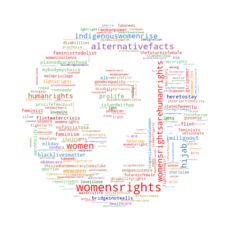

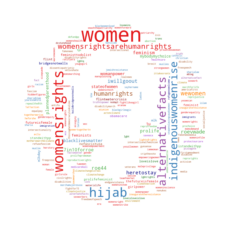

In [3]:
wc = WordCloud(height = wc_height, width = wc_width, mask = image,
               background_color = "white", random_state = 150)

# tweet word cloud ----
wc.generate_from_frequencies(tweet_hashtag)
wc.recolor(color_func = get_color)
plt.figure()
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.savefig("tweet.png", dpi = 1000)

# retweet word cloud ----
wc.generate_from_frequencies(retweet_hashtag)
wc.recolor(color_func = get_color)
plt.figure()
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.savefig("retweet.png", dpi = 1000)